# LAB 3: Classification using different methods: SVM, KNN, Logistic

AI and ML- theory and practice

Jose Sebastian Villalba

October 3, 2023

## Index

This following Jupyter Notebook has been divided in the following sectioins

- Importing Datasets

- Spliting the dataset into training and testing datasets

Then I will analyze the three models over the entire dataset (30 features)

- Logistic Regression Classifier

- SVM Classifier (Hyperparameter tuning and predictions)

- KNN Classifier

Then, I will analyze the models on a 5 dimensions dataset to analyze the efficiency of dimension - reduction

- Logistic Regression Classifier

- SVM Classifier (Hyperparameter tuning and predictions)

- KNN Classifier

FINALLY, YOU WILL FIND A RESULTS ANALYSIS SECTION




In [3]:
#importing libraries
import pandas as pd
from sklearn import neighbors, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## Importing the dataset

For this step I will import the fataset by following the indications described in the breast cancer Winsconsin dataset: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic


In [4]:
pip install ucimlrepo

The following code will import the dataset, split it into two chunks (target and features) and display some information of the dataset specifying that there are no missing values in the dataset and columns have the right type of data. This means that no text to number transformation is needed.


In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Life Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Mon Jul 17 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53f0fbb42

This means that we have 30 numerical features with no null values on it

## Spliting the dataset into train and test datasets

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
x_train.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.31,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.68,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.01,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.25,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.02,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020


I will analyze now the target values in the dataset jost to know whether the dataset is imbalanced, and to define wether it is important to transform this data into numerical values.

In [7]:
#frequency of diagnosis
frequ_diagnosis_train = y_train['Diagnosis'].value_counts()
print(frequ_diagnosis_train)
frequ_diagnosis_test = y_test['Diagnosis'].value_counts()
print(frequ_diagnosis_test)

B    286
M    169
Name: Diagnosis, dtype: int64
B    71
M    43
Name: Diagnosis, dtype: int64


## Creating the Logistic Regression Classifier

In the following block of code I will create the basic logistic regression classifier as lr_classifier, train the model using the train datasets and create the predicted targets

In [8]:
lr_classifier = LogisticRegression()
lr_classifier.fit(x_train,y_train)
y_predicted_lr = lr_classifier.predict(x_test)
print(y_predicted_lr)

['B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'M' 'M']


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


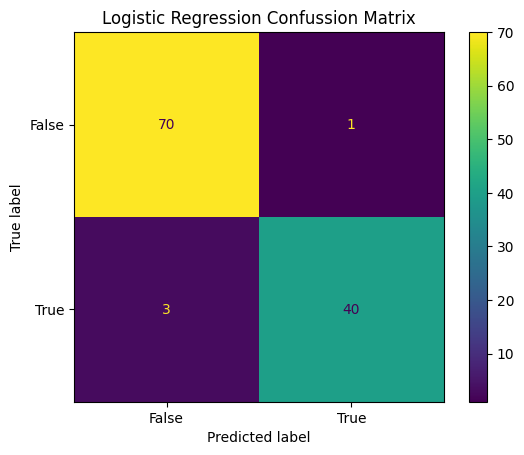

In [9]:
cm_lr = confusion_matrix(y_test,y_predicted_lr)
cm_lr_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_lr ,display_labels=[False,True])
cm_lr_display.plot()
plt.title('Logistic Regression Confussion Matrix')
plt.show()

In [10]:
print(classification_report(y_test,y_predicted_lr))

              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## Creating the Support Vector Machine Classifier

### Hyperparameter tuning for SVM

In [ ]:
svm_grid = {'C': [0.1,1,10,100],
            'gamma': [0.0001,0.001,0.01,0.1,1],
            'kernel':['rbf']}
svm_hypertun = GridSearchCV(SVC(),svm_grid,refit=True,verbose = 3)
svm_hypertun.fit(x_train,y_train)


In [12]:
print(svm_hypertun.best_params_)

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


These are the parameters that I will use in the SVM classificator to predict the new values in the test dataset

### Predicting using SVM and analyzing the results

In [13]:
svm_classifier = SVC(C = 10,kernel ='rbf',gamma = 0.0001)
svm_classifier.fit(x_train,y_train)
y_predicted_svm = svm_classifier.predict(x_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


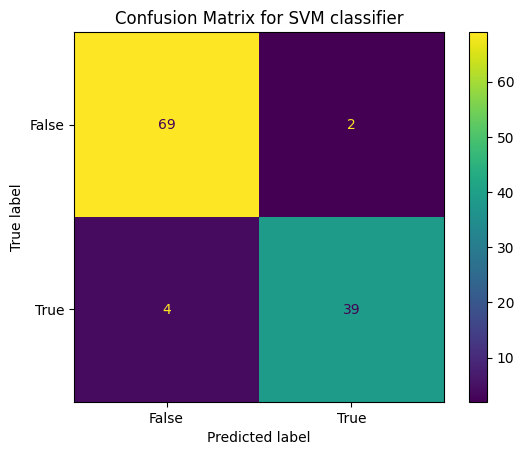

In [14]:
cm_svm = confusion_matrix(y_test,y_predicted_svm)
cm_svm_display = metrics.ConfusionMatrixDisplay(confusion_matrix= cm_svm,display_labels = [False,True])
cm_svm_display.plot()
plt.title('Confusion Matrix for SVM classifier')
plt.show()

In [15]:
print(classification_report(y_test,y_predicted_svm))

              precision    recall  f1-score   support

           B       0.95      0.97      0.96        71
           M       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



## K Nearest Neighbors Classifier

### Preprocessing the data

One important characteristic of the KNN classifier is that as it measures the distance to classify a new value into a specific category, the scale of each measure can affect this distance. So, in order to create an accurate KNN classifier, first I will re-scale all data to have mean 0 and std = 1.

In [16]:
scaler = StandardScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train),columns = x_train.columns)
x_test_scaled = pd.DataFrame(scaler.fit_transform(x_test),columns = x_test.columns)
#now lets confirm whether the dataset is properly transformed
x_train_scaled.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,...,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02
mean,-3.162306e-16,-3.513673e-17,-1.132183e-16,3.669836e-16,-2.381489e-16,-4.294489e-17,-5.953723e-17,2.225326e-16,1.444510e-16,5.055785e-16,...,-7.027346e-17,-6.754060e-16,-2.928061e-17,1.815398e-16,-1.561632e-17,-2.249727e-16,-7.612958e-17,-8.198570e-17,5.153387e-16,2.147245e-17
std,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,...,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00
min,-1.819583e+00,-2.223500e+00,-1.809497e+00,-1.365036e+00,-3.100011e+00,-1.607228e+00,-1.119899e+00,-1.269910e+00,-2.345430e+00,-1.776889e+00,...,-1.572438e+00,-2.230887e+00,-1.578174e+00,-1.152259e+00,-2.617938e+00,-1.455995e+00,-1.312795e+00,-1.749805e+00,-2.124261e+00,-1.616973e+00
25%,-6.830930e-01,-7.075360e-01,-6.907613e-01,-6.602049e-01,-7.132037e-01,-7.770872e-01,-7.505387e-01,-7.349048e-01,-7.010461e-01,-7.097920e-01,...,-6.616975e-01,-7.412292e-01,-6.853483e-01,-6.358132e-01,-7.430298e-01,-6.961323e-01,-7.555873e-01,-7.700987e-01,-6.499846e-01,-7.189616e-01
50%,-2.314983e-01,-1.185158e-01,-2.429378e-01,-2.895973e-01,-8.082013e-02,-2.413402e-01,-3.446456e-01,-3.911235e-01,-6.915087e-02,-1.772851e-01,...,-2.632354e-01,-5.210786e-02,-2.829543e-01,-3.357508e-01,-2.741590e-02,-2.753858e-01,-2.304110e-01,-2.386392e-01,-1.236838e-01,-2.135847e-01
75%,4.593426e-01,5.631988e-01,4.884799e-01,3.193386e-01,6.331729e-01,5.281282e-01,5.473870e-01,6.737569e-01,5.354290e-01,4.642225e-01,...,4.525400e-01,6.857059e-01,5.263332e-01,2.724862e-01,6.296478e-01,5.738568e-01,5.383496e-01,7.189995e-01,4.319440e-01,4.600643e-01
max,3.961679e+00,4.715674e+00,3.976811e+00,5.208312e+00,4.864642e+00,3.964311e+00,4.256736e+00,4.022271e+00,4.476124e+00,4.815921e+00,...,4.120889e+00,3.962127e+00,4.322305e+00,5.955420e+00,3.767506e+00,4.424833e+00,4.672828e+00,2.709674e+00,5.917679e+00,4.999482e+00


### Finding the best K

In [ ]:
#creating a list of accuracy scores
a = []
for i in range(1,20):
  knn_classifier = KNeighborsClassifier(n_neighbors=i)
  knn_classifier.fit(x_train_scaled,y_train)
  y_predicted_knn = knn_classifier.predict(x_test_scaled)
  a.append(metrics.accuracy_score(y_test,y_predicted_knn))


In [18]:
for i in range(1,20):
  print('accuracy for ' + str(i) + ' neighbors: ', str(a[i-1]))

accuracy for 1 neighbors:  0.9210526315789473
accuracy for 2 neighbors:  0.9298245614035088
accuracy for 3 neighbors:  0.956140350877193
accuracy for 4 neighbors:  0.9385964912280702
accuracy for 5 neighbors:  0.956140350877193
accuracy for 6 neighbors:  0.956140350877193
accuracy for 7 neighbors:  0.956140350877193
accuracy for 8 neighbors:  0.956140350877193
accuracy for 9 neighbors:  0.9649122807017544
accuracy for 10 neighbors:  0.9385964912280702
accuracy for 11 neighbors:  0.956140350877193
accuracy for 12 neighbors:  0.9473684210526315
accuracy for 13 neighbors:  0.956140350877193
accuracy for 14 neighbors:  0.9473684210526315
accuracy for 15 neighbors:  0.956140350877193
accuracy for 16 neighbors:  0.9473684210526315
accuracy for 17 neighbors:  0.9473684210526315
accuracy for 18 neighbors:  0.9473684210526315
accuracy for 19 neighbors:  0.9473684210526315


According to this, I will use 9 neighbors in the KNN classifier as it gives the best accuracy

### Asessing the KNN classifier

In [19]:
#Using the KNN classifier with number of neighbors equal to 9
knn_classifier = KNeighborsClassifier(n_neighbors=9)
knn_classifier.fit(x_train_scaled,y_train)
y_predicted_knn = knn_classifier.predict(x_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [20]:
print(classification_report(y_test,y_predicted_knn))

              precision    recall  f1-score   support

           B       0.97      0.97      0.97        71
           M       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



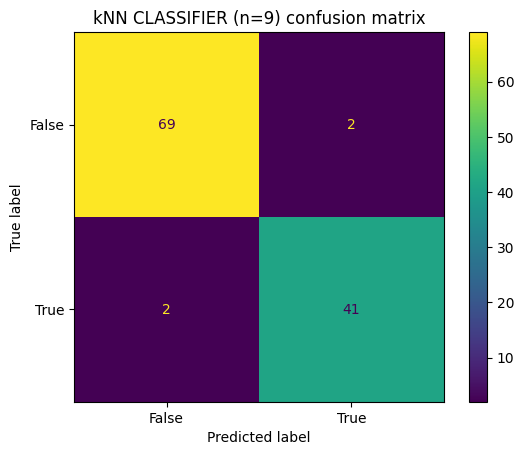

In [21]:
cm_knn = confusion_matrix(y_test,y_predicted_knn)
cm_knn_display = metrics.ConfusionMatrixDisplay(cm_knn,display_labels = [False,True])
cm_knn_display.plot()
plt.title("kNN CLASSIFIER (n=9) confusion matrix")
plt.show()

## Using the classifiers in a dimension-reduced dataset

The first step to reduce the dimensionality of the dataset is to analyze the correlation between features. So, in the next piece of code I will hprint the heatma of the correlation matrix

<Axes: >

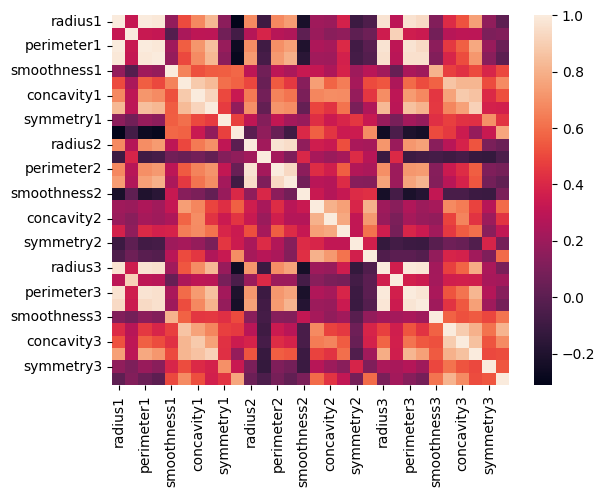

In [27]:
correlation_dataset = X.corr()
correlation_dataset.head()
sns.heatmap(correlation_dataset)

These results indicate that there are  features with high correlations, which (such as perimeter 1 and perimeter 3). So this means that tere are chances of reducing the dimensionality of the dataset.

> Indented block




### Reduced dimensionality analysis for Logistic regression

In [29]:
#Importing the lbrary for reducing dimensionality
from mlxtend.feature_selection import SequentialFeatureSelector

In [ ]:
lr_featureselection = SequentialFeatureSelector(LogisticRegression(),k_features=5,forward = True,scoring='accuracy',cv = None)
lr_selectedfeatures = lr_featureselection.fit(x_train,y_train)

In [40]:
print(list(lr_selectedfeatures.k_feature_names_))

['radius1', 'perimeter1', 'radius3', 'texture3', 'concavity3']


In [44]:
x_train_reduced_logreg = x_train[list(lr_selectedfeatures.k_feature_names_)]
x_test_reduced_logreg = x_test[list(lr_selectedfeatures.k_feature_names_)]
x_train_reduced_logreg.head(1)

,radius1,perimeter1,radius3,texture3,concavity3
68,9.029,58.79,10.31,22.65,1.252


In [48]:
#fitting and predicting y values with the logistic regression
lr_clas_dimenred = LogisticRegression()
lr_clas_dimenred.fit(x_train_reduced_logreg,y_train)
y_predicted_lr_reduc = lr_clas_dimenred.predict(x_test_reduced_logreg)
#asessing the classification with only 5 predictors
print(classification_report(y_test,y_predicted_lr_reduc))

              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Reduced-dimensionality analysis for SVM Classificator

#### Finding the 5 most important features

In [ ]:
svm_reduced_classificator = SequentialFeatureSelector(SVC(),k_features=5,forward = True,scoring ='accuracy',cv = None)
svm_reduced_classificatorfitted = svm_reduced_classificator.fit(x_train,y_train)

In [51]:
print(list(svm_reduced_classificatorfitted.k_feature_names_))

['radius1', 'texture1', 'perimeter2', 'radius3', 'texture3']


Texture 1, perimeter 2, and texture 3, were not part of the reduced dataset for the logistic regression. Now let't take a look at the classification accuracy for the svm classifier applied over this new dataset

#### Reducing the dimensionality accordingly

In [65]:
x_train_reduced_svm = x_train[list(svm_reduced_classificatorfitted.k_feature_names_)]
x_test_reduced_svm = x_test[list(svm_reduced_classificatorfitted.k_feature_names_)]
x_train_reduced_svm.head(2)

,radius1,texture1,perimeter2,radius3,texture3
68,9.029,17.33,1.885,10.31,22.65
181,21.090,26.57,4.414,26.68,33.48


In [ ]:
#Hyperparameter tuning of the svm classifier
svm_reduc_hypertun = GridSearchCV(SVC(),svm_grid,refit=True,verbose = 3); #svm_grid had been created on the first section of hyperparameter tuning for Support Vector Machine
svm_reduc_hypertun.fit(x_train_reduced_svm,y_train);


In [60]:
#Printing the best hyperparameters
print(svm_reduc_hypertun.best_params_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


#### Creating the SVM classifier and assessing it

In [67]:
# Creating the SVM classifier with the optimal hyperparameters.
svm_reduc_classifier = SVC(C=10,gamma=0.001,kernel='rbf')
svm_reduc_classifier.fit(x_train_reduced_svm,y_train)
y_predicted_svm_redu = svm_reduc_classifier.predict(x_test_reduced_svm)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Now let's assess the performance of the svm classifier with a dimension-reduced dataset.

In [68]:
print(classification_report(y_test,y_predicted_svm_redu))

              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### Reduced-dimensionality analysis for KNN

In [ ]:
knn_reduced_classificator = SequentialFeatureSelector(KNeighborsClassifier(),k_features=5,forward = True,scoring ='accuracy',cv = None)
knn_reduced_classificatorfitted = knn_reduced_classificator.fit(x_train,y_train)

In [71]:
print(knn_reduced_classificatorfitted.k_feature_names_)

('radius1', 'smoothness1', 'texture3', 'perimeter3', 'compactness3')


#### reducing the dimensions accordingly

In [74]:
x_train_reduced_knn = x_train_scaled[list(knn_reduced_classificatorfitted.k_feature_names_)]
x_test_reduced_knn = x_test_scaled[list(knn_reduced_classificatorfitted.k_feature_names_)]

#### Asessing the KNN with reduced dimensionality accordingly

In [76]:
knn_classifier_red = KNeighborsClassifier(n_neighbors=9)
knn_classifier_red.fit(x_train_reduced_knn,y_train)
y_prediced_knn_reduc = knn_classifier_red.predict(x_test_reduced_knn)
print(classification_report(y_test,y_prediced_knn_reduc))

              precision    recall  f1-score   support

           B       0.96      0.97      0.97        71
           M       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## RESULTS ANALYSIS

The dimension reduction of the dataset did not affect the performance of the models. In terms of accuracy the results are:

Accuracy Logistic Regression - entire dataset: 96

Accuracy SVM - entire dataset: 95

Accuracy KNN - ENTIRE DATASET: 96,

Accuracy Logistic Regression - REDUCED dataset: 96

Accuracy SVM - REDUCED dataset: 96

Accuracy KNN - REDUCED DATASET: 96

According to these results, using only 5 features, the models reached its highest precission. So by dropping 25 features for the dataset the computation efficiency increases without compromising accuracy.

Note that  the SVM model reached a better accuracy with the reduced dimensions dataset. One hypothesis for this, is that the hyperparameter tuning for the SVM applied to the entiredataset lacked of a higher grid to find the optimal hyperparameters. Anyway, for the purpose of this project, the results keep demonstrating that dimensionality reduction is efficient in this project.
